<a href="https://colab.research.google.com/github/dkanzariya/Computer-Vision/blob/main/bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.16.1

# Object Detection and Bounding Boxes
:label:`sec_bbox`


In the previous section, we introduced many models for image classification. In image classification tasks, we assume that there is only one main target in the image and we only focus on how to identify the target category. However, in many situations, there are multiple targets in the image that we are interested in. We not only want to classify them, but also want to obtain their specific positions in the image. In computer vision, we refer to such tasks as object detection (or object recognition).

Object detection is widely used in many fields. For example, in self-driving technology, we need to plan routes by identifying the locations of vehicles, pedestrians, roads, and obstacles in the captured video image. Robots often perform this type of task to detect targets of interest. Systems in the security field need to detect abnormal targets, such as intruders or bombs.

In the next few sections, we will introduce multiple deep learning models used for object detection. Before that, we should discuss the concept of target location. First, import the packages and modules required for the experiment.


In [ ]:
%matplotlib inline
from d2l import torch as d2l
import torch

Next, we will load the sample images that will be used in this section. We can see there is a dog on the left side of the image and a cat on the right. They are the two main targets in this image.


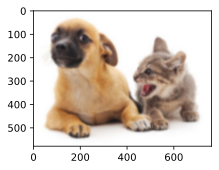

In [ ]:
d2l.set_figsize()
img = d2l.plt.imread('/content/catdogs.png')
d2l.plt.imshow(img);

## Bounding Box

In object detection, we usually use a bounding box to describe the target location.
The bounding box is a rectangular box that can be determined by the $x$ and
$y$ axis coordinates in the upper-left corner and the $x$ and $y$ axis
coordinates in the lower-right corner of the rectangle.
Another commonly used bounding box representation is the $x$ and $y$ axis
coordinates of the bounding box center, and its width and height.
Here we define functions to convert between these two
representations, `box_corner_to_center` converts from the two-corner
representation to the center-width-height presentation,
and `box_center_to_corner` vice verse.
The input argument `boxes` can be either a length $4$ tensor,
or a $(N, 4)$ 2-dimensional tensor.


In [ ]:
#@save
def box_corner_to_center(boxes):
    """Convert from (upper_left, bottom_right) to (center, width, height)"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

#@save
def box_center_to_corner(boxes):
    """Convert from (center, width, height) to (upper_left, bottom_right)"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

We will define the bounding boxes of the dog and the cat in the image based
on the coordinate information. The origin of the coordinates in the image
is the upper left corner of the image, and to the right and down are the
positive directions of the $x$ axis and the $y$ axis, respectively.


In [ ]:
# bbox is the abbreviation for bounding box
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

We can verify the correctness of box conversion functions by converting twice.


In [ ]:
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) - boxes

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

We can draw the bounding box in the image to check if it is accurate. Before drawing the box, we will define a helper function `bbox_to_rect`. It represents the bounding box in the bounding box format of `matplotlib`.


In [ ]:
#@save
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

After loading the bounding box on the image, we can see that the main outline of the target is basically inside the box.


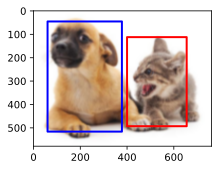

In [ ]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## Summary

* In object detection, we not only need to identify all the objects of interest in the image, but also their positions. The positions are generally represented by a rectangular bounding box.

## Exercises

1. Find some images and try to label a bounding box that contains the target. Compare the difference between the time it takes to label the bounding box and label the category.


[Discussions](https://discuss.d2l.ai/t/1527)
